In [1]:
import json
import math
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler
import os

def load_json_data(filename):
    """Load data from a JSON file."""
    with open(filename, "r") as f:
        return json.load(f)
    
def configure_scientific_style():
    """Configure matplotlib for scientific publication quality plots."""
    # Create output directory if it doesn't exist
    os.makedirs("figures", exist_ok=True)
    
    # Set up a scientific style with smoke gray background
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Define a color-blind friendly scientific color palette
    # Based on ColorBrewer and scientific publication standards
    scientific_colors = ['#0173B2', '#DE8F05', '#029E73', '#D55E00', 
                        '#CC78BC', '#CA9161', '#FBAFE4', '#949494', 
                        '#ECE133', '#56B4E9']
    
    plt.rcParams['axes.prop_cycle'] = cycler(color=scientific_colors)
    plt.rcParams['figure.facecolor'] = "#FFFFFF"
    plt.rcParams['axes.facecolor'] = '#F5F5F5'    # Smoke gray background
    plt.rcParams['savefig.facecolor'] = '#F5F5F5' # Smoke gray background
    plt.rcParams['grid.color'] = '#CCCCCC'        # Light gray grid
    plt.rcParams['font.family'] = 'serif'         # Standard serif font for academic publishing
    plt.rcParams['font.size'] = 14                # Professional font size
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['legend.fontsize'] = 14
    plt.rcParams['figure.titlesize'] = 18

    # Add these legend-specific settings:
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.framealpha'] = 1.0
    plt.rcParams['legend.facecolor'] = 'white'
    #plt.rcParams['legend.edgecolor'] = 'black'

def plot_results():
    """Plot results from JSON files into separate figure files."""
    # Configure scientific plotting style
    configure_scientific_style()
    
    # Find all matching files and sort them
    # Open file
    embeddings = ["angle_embedding", "amplitude_embedding"]
    depth = 1
    embedding = embeddings[1]
    results = json.load(open(f"../{embedding}_depth_{depth}.json"))

    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    
    data = results

    min_value = min([min(data[str(j)].values()) for j in range(1, len(data)+1)]) * 0.5
    max_value = max([max(data[str(j)].values()) for j in range(1, len(data)+1)]) * 2

    for ansatz_id, data in data.items():

        x_values = list(map(int, data.keys()))
        sorted_indices = np.argsort(x_values)
        x_values = [x_values[idx] for idx in sorted_indices]
        y_values = [list(data.values())[idx] for idx in sorted_indices]
        
        plt.plot(x_values, y_values, marker="o", linestyle='-', 
                linewidth=2, markersize=6, label=f"{ansatz_id}")
    
    # Configure the plot
    plt.xlabel("Number of cycles", fontweight='bold')
    plt.ylabel("Variance of expectation values", fontweight='bold')
    plt.yscale("log")
    plt.ylim(min_value, max_value)
    plt.grid(True, alpha=0.7, linestyle='--')

    plt.legend(title="Ansatz id", bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

    plt.box(True)
    plt.tight_layout()

    filename = f"figures//sim_ansatz_plot_{embedding}_depth_{depth}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved figure to {filename}")

Saved figure to figures//sim_ansatz_plot_amplitude_embedding_depth_1.png


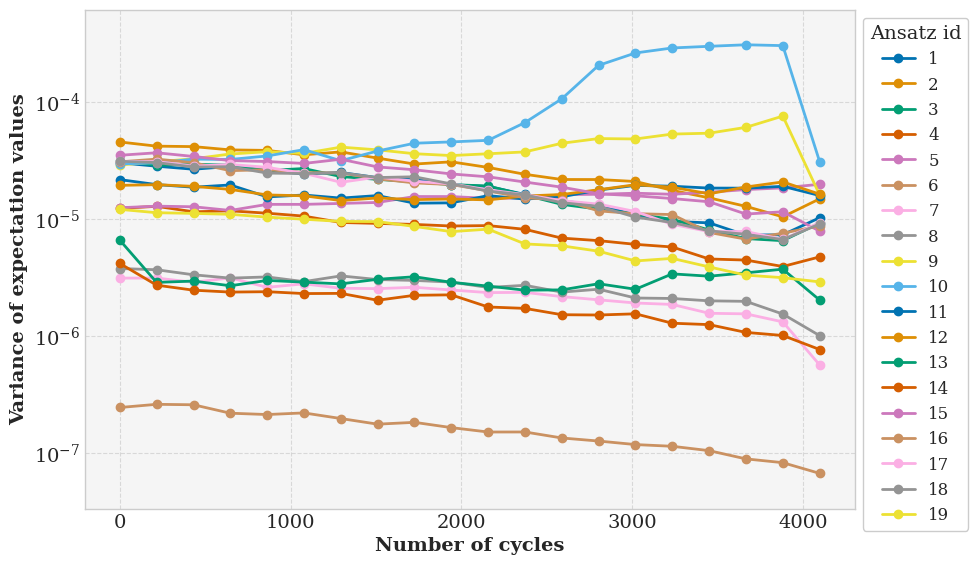

In [2]:
plot_results()